<span style="font-size:1.8em;">**CYCLISTIC BIKE-SHARE CASE STUDY**

<span style="font-size:1.2em; font-style: italic"> Growing Business through a Riders Journey
    
![](https://miro.medium.com/max/293/1*nPqUTH1pkj8BWtQrd8WYIg.png)
    
##### By Jonathan Corea
##### Date: June 12, 2023

<h4 style="background-color:teal;color:white;border-radius: 8px; padding:12px">
    <span style="font-weight:bold">Background:</span> Understanding Cyclistic's Business Model
    </h4>


<p>
Since its inception in 2016, Cyclistic's popularity and usefulness amongst users has led to incredulous growth. Cyclistic has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Given this business model Cyclistic’s marketing strategy relies on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as __casual riders__. Customers who purchase annual memberships are Cyclistic __members__. In terms of financial viability, the finance analysts at Cyclistic have concluded that memberships are more profitable than casual riders due to the nature of their uses.
</p>
    
<p>
In order to answer the key business questions, I followed the steps of the data analysis process: <span style="font-weight:bold">ask, prepare, process, analyze, share, and act.</span>
</p>

<h4 style="background-color:teal;color:white;border-radius: 8px; padding:12px">
    <span style="font-weight:bold">ASK:</span> Defining the Business Task
</h4>

#### <span style='color:#2D8FC5'>The Stakeholders</span>
1. __Lily Moreno:__ The director of marketing. Responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
2. __Cyclistic marketing analytics team:__ A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.
3. __Cyclistic executive team:__ Responsible for undertaking executive decisions.

#### <span style='color:#2D8FC5'>Business Task</span>

Given the two customer classes, casual riders and members, the marketing director has come up with a hypothesis: converting casual riders into members would lead to better growth prospects for Cyclistic. This study will aim to back this hypothesis up by answering the following questions:

* <span style='font-style:italic;font-weight:bold'>How do annual members and casual riders use Cyclistic bikes differently?</span>
* <span style='font-style:italic; font-weight:bold'>Why would casual riders buy Cyclistic annual memberships?</span>
* <span style='font-style:italic; font-weight:bold'>How can Cyclistic use digital media to influence casual riders to become members?</span>



<h4 style="background-color:teal;color:white;border-radius: 8px; padding:12px">
    <span style="font-weight:bold">Preparation:</span> Data Source & Preparation
</h4>

#### <span style='color:#2D8FC5'>Source</span>

The data used in this project has been made available by Motivate International Inc. under this [lincense](https://ride.divvybikes.com/data-license-agreement). The datasets are named differently because Cyclistic is a fictional company. However Divvy, the name displayed on the data files, is a real bike-share system in Chicago with 692 stations and a fleet of 5,824 bicycles. The data has been made public and can be used to explore how varying customer types are using Cyclistic bikes. The most recent 12 month Cyclistic trip data can be downloaded [here](https://divvy-tripdata.s3.amazonaws.com/index.html). 

The 12-month time period used in the study consists of <span style='font-weight:bold'>May 2022 - Apr 2023</span>. The data is in a structured format, stored as .csv files. Since the data collected is by a real bike sharing company in Chicago, the data is __reliable__ and free of bias. Additionally, the data is __current__ going up to Apr 2023, __original, comprehensive, accurate, and cited.__ 

#### <span style='color:#2D8FC5'>Limitations</span>

It is important to note, however, that data-privacy safeguarding has been implemented to keep users __personal information__ confidential. This means that credit cards will not be available to link user order purchases to determine if Cyclistic riders live within Cyclistic service area, or if they have purchases multiple single passes.

Furthermore, due to lack of financial information it will not be possible to determine if a casual rider spends more money in a year than than on an annual membership. Other limitations include customer segmentation analysis for each user type according to their age, gender, and neighborhood. Nonetheless, the dataset can still be utilized to explore trends and learn how casual riders and members differ in their bike rental habits. 

Additionally, the data does not contain information related to assistive options such as reclining bikes, hand tricycles, and cargo bikes which makeup 8% of cyclistic rider population. Thus, it will not be investigated. 

#### <span style='color:#2D8FC5'>Meta data</span>

* __ride_id:__ Unique identifier for bike order rental
* __rideable_type:__ Bike type either `classic`, `electric`, or `docked`.
* __started_at:__ Star time of bike rental.
* __ended_at":__ End time of bike rental. 
* __start_station_name:__ Station name where bike rental started.
* __start_station_id:__ Station id where bike rental started.
* __end_station_name:__ End station name where bike rental ended.
* __end_station_id:__ End station id where bike rental ended.
* __start_lat:__ latitude coordinate where bike rental started.
* __start_lng:__ longditude coordinate where bike rental started.
*  __end_lat:__ Latitude coordinate where bike rental ended.
* __end_lng:__  Longditude coordinate where bike rental ended.
* __member_casual:__ User type either `casual` or `member`

<h4 style="background-color:teal;color:white;border-radius: 8px; padding:12px">
    <span style="font-weight:bold">Process</span> 
</h4>

#### <span style='color:#2D8FC5'>Installing Packages</span>

<p>
Install numpy and pandas libraries  
</p>

#### <span style='color:#2D8FC5'>Create Path Directory</span>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.api.types import CategoricalDtype

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# list to hold data url
data_url_paths = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        data_url_paths.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

print(data_url_paths)

['/kaggle/input/cyclistic/202212-divvy-tripdata.csv', '/kaggle/input/cyclistic/202208-divvy-tripdata.csv', '/kaggle/input/cyclistic/202205-divvy-tripdata.csv', '/kaggle/input/cyclistic/202206-divvy-tripdata.csv', '/kaggle/input/cyclistic/202301-divvy-tripdata.csv', '/kaggle/input/cyclistic/202211-divvy-tripdata.csv', '/kaggle/input/cyclistic/202302-divvy-tripdata.csv', '/kaggle/input/cyclistic/202209-divvy-publictripdata.csv', '/kaggle/input/cyclistic/202304-divvy-tripdata.csv', '/kaggle/input/cyclistic/202303-divvy-tripdata.csv', '/kaggle/input/cyclistic/202210-divvy-tripdata.csv', '/kaggle/input/cyclistic/202207-divvy-tripdata.csv']



#### <span style='color:#2D8FC5'>Installing Visualization Libraries</span>

<p>
For this analysis will be using seaborn library to analyze data and create visualizations. 
</p>    

In [2]:
# visualization
import matplotlib.pyplot as plt
# import seaborn as sns # Can alternatively use seaborn
%matplotlib inline 

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import cufflinks as cf

import datetime as datetime

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



#### <span style='color:#2D8FC5'>Loading Data</span>

Prior to loading the data into a pandas dataframe, data was opened in excel to determine datatypes. Once deteremined, datatypes where stated when loading in pandas dataframe, respectively, to reduce processing time. Additionally used the pyarrow engine when reading a csv file into a dataframe to reduce processing time after doing a bit of research. If interested, further reading into pyarrow engine can be found [here](https://pythonspeed.com/articles/pandas-read-csv-fast/). 

I also tried using a Dask dataframe, according to this [artilce](https://medium.com/analytics-vidhya/optimized-ways-to-read-large-csvs-in-python-ab2b36a7914e). Using a Dask dataframe was initially the most time efficient in processing data. Nevertheless, due to having to having to convert to a pandas dataframe to perform specific data transformations decided to stick to the pandas dataframe utilizing the pyarrow engine.

Furthermore,created a loop to read each csv file into its own respective dataframe, and stored in a list. 

Processing time can be further improved by creating a function utilizing chunksize to read each dataframe in conjunction with the pyarrow engine. 


In [3]:
#load data from original csv files: May2022 to Apr2023
engine = "pyarrow"

dtypes = {"ride_id":"object","rideable_type":"category","started_at":"datetime64[ns]","ended_at":"datetime64[ns]",
          "start_station_name":"object","start_station_id":"object","end_station_name":"object",
          "end_station_id":"object","start_lat":"float64","start_lng":"float64",
          "end_lat":"float64","end_lng":"float64","member_casual":"category"}


cyclistic_df_names = ["may_2022_df","jun_2022_df","jul_2022_df","aug_2022_df","sep_2022_df","oct_2022_df","nov_2022_df","dec_2022_df", "jan_2023_df","feb_2023_df","mar_2023_df", "apr_2023_df"]
df_list=[]
# loop through df list and url paths to make dataframes

for i,df_name in enumerate(cyclistic_df_names):
    df_name = pd.read_csv(data_url_paths[i], engine=engine, dtype=dtypes)
    df_list.append(df_name)

#### <span style='color:#2D8FC5'>Combining Data</span>

Used pandas concat function to combine all 12-months of cyclistic data. 

I also created a copy of the combined dataframe.

In [4]:
# combine all the dataframes together and start to clean the columns
cyc_data_combined = pd.concat(df_list,ignore_index=True)
cyc_data_combined_cp = cyc_data_combined.copy()

# cyc_data_combined head
cyc_data_combined.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual


#### <span style='color:#2D8FC5'>Cyclistic Data Info</span>

In [5]:
cyc_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859061 entries, 0 to 5859060
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(5)
memory usage: 502.9+ MB


#### <span style='color:#2D8FC5'>Missing Values</span>

In [6]:
# check missing values
cyc_data_combined.isnull().sum()*100/(cyc_data_combined.shape[0])

ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    0.000000
start_station_id      0.000000
end_station_name      0.000000
end_station_id        0.000000
start_lat             0.000000
start_lng             0.000000
end_lat               0.101945
end_lng               0.101945
member_casual         0.000000
dtype: float64

About 0.10% of the data seems to be missing for the ending latitude and longditude columns. These particular rows will be dropped from the cyclistic dataframe as starting and ending locations want to be utilized to find differences in areas where casual and member cyclistic users use bikes. 

In [7]:
# drop missing values
cyc_data_combined.dropna(axis=0, subset=["end_lat","end_lng"], inplace=True)

In [8]:
# check missing values have been removed
cyc_data_combined.isnull().sum()*100/(cyc_data_combined.shape[0])

ride_id               0.0
rideable_type         0.0
started_at            0.0
ended_at              0.0
start_station_name    0.0
start_station_id      0.0
end_station_name      0.0
end_station_id        0.0
start_lat             0.0
start_lng             0.0
end_lat               0.0
end_lng               0.0
member_casual         0.0
dtype: float64

<h4 style="background-color:teal;color:white;border-radius: 8px; padding:12px">
    <span style="font-weight:bold">Data Transformation</span> 
</h4>

In this phase of the project ,some data transformations and calculations will be applied. station names columns will be cleaned by transforming text to all lower case and trimming off any white space. Furthermore, information from the `started_at` and `ended_at` columns will be extracted as `hour`,`day`,`month`, `year`, and followed by a calcuation to determine `ride_length_min`  


#### <span style='color:#2D8FC5'>Data Transformation</span> 

The `start_station_name` and `end_station_name` columns were all lowered to have consistency in naming conventions. 

In [9]:
# lower starting station names
cyc_data_combined['start_station_name'] = cyc_data_combined['start_station_name'].str.strip().str.lower()
cyc_data_combined['end_station_name'] = cyc_data_combined['end_station_name'].str.strip().str.lower()


There seems to be some start_station_names that are still unnamed, but not picked up as null. Thus, will drop these values

In [10]:
start_station = cyc_data_combined.groupby('start_station_name').size().to_frame(name='number_of_starts').reset_index().sort_values(by='number_of_starts', ascending=False)
start_station.head()

empty_starts = (start_station['number_of_starts'][0])*100/(cyc_data_combined.shape[0])
empty_starts

end_station = cyc_data_combined.groupby('end_station_name').size().to_frame(name='number_of_starts').reset_index().sort_values(by='number_of_starts', ascending=False)
end_station.head()

empty_end_stations = (end_station['number_of_starts'][0])*100/(cyc_data_combined.shape[0])
empty_end_stations

print({'empty_start_station_names': empty_starts, 'empty_end_station_names': empty_end_stations})


{'empty_start_station_names': 14.214872559578806, 'empty_end_station_names': 15.097808199705865}


14% of start stations and 15% of end stations do not have an actual value recorded. These will be dropped, as station name will be analyzed to determine busy stations among casual and member bike riders.

In [11]:
# Filter out data with non-empty start_station_names and end_station_names
cyc_data_combined = cyc_data_combined[cyc_data_combined['start_station_name'] != '']
cyc_data_combined = cyc_data_combined[cyc_data_combined['end_station_name'] != '']

start_station = cyc_data_combined.groupby('start_station_name').size().to_frame(name='number_of_starts').reset_index().sort_values(by='number_of_starts', ascending=False)
start_station.head()

,start_station_name,number_of_starts
1460,streeter dr & grand ave,70849
343,dusable lake shore dr & monroe st,39352
757,michigan ave & oak st,37822
344,dusable lake shore dr & north blvd,37751
1525,wells st & concord ln,35303


In [12]:
end_station = cyc_data_combined.groupby('end_station_name').size().to_frame(name='number_of_starts').reset_index().sort_values(by='number_of_starts', ascending=False)
end_station.head()

,end_station_name,number_of_starts
1498,streeter dr & grand ave,72327
351,dusable lake shore dr & north blvd,40790
772,michigan ave & oak st,38916
350,dusable lake shore dr & monroe st,38236
1564,wells st & concord ln,35636


There seems to be some start_station_names that are still unnamed, but not picked up as null. Thus, will drop these values

Convert the `started_at` and `ended_at` columns to iso_format to isolate time from dates.

In [13]:
# code to convert to datetime
import datetime as datetime
iso_format = "%Y-%m-%d %H:%M:%S" # format that want dates in 
cyc_data_combined['started_at']= pd.to_datetime(cyc_data_combined['started_at'], format=iso_format)
cyc_data_combined['ended_at']= pd.to_datetime(cyc_data_combined['ended_at'], format=iso_format)

# check to see that conversion worked
cyc_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534245 entries, 0 to 5858887
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(5)
memory usage: 423.8+ MB


Calculate the ride length in minutes, and store in `ride_length_min` column. Data stored as int32.

In [14]:
# column that stores ride_length 
cyc_data_combined['ride_length_min'] = cyc_data_combined['ended_at'] - cyc_data_combined['started_at'] # difference stored in datetime object
cyc_data_combined['ride_length_min'] = cyc_data_combined['ride_length_min']/pd.Timedelta(minutes=1) # extract minutes 
cyc_data_combined['ride_length_min'] = cyc_data_combined['ride_length_min'].astype('int32') # convert to int

In [15]:
# Add hour column
cyc_data_combined['hour'] = cyc_data_combined['started_at'].dt.hour

In [16]:
# replace 0 hour with 24hour
cyc_data_combined['hour'] = cyc_data_combined['hour'].replace(0,24)

#### <span style='color:#2D8FC5'> Removing Outliers: Remove rides less than 1 minute</span>

In [17]:
# check to see ride length is not negative
cyc_data_combined[cyc_data_combined['ride_length_min']<1].count()


ride_id               89663
rideable_type         89663
started_at            89663
ended_at              89663
start_station_name    89663
start_station_id      89663
end_station_name      89663
end_station_id        89663
start_lat             89663
start_lng             89663
end_lat               89663
end_lng               89663
member_casual         89663
ride_length_min       89663
hour                  89663
dtype: int64

In [18]:
# Removing negative ride_length_min values from cyc_data_combined dataframe
cyc_data_combined = cyc_data_combined[cyc_data_combined['ride_length_min']>=1]

In [19]:
# check to see values removed
cyc_data_combined['ride_length_min'].sort_values(ascending=True)

5306475        1
4171211        1
2783587        1
3552685        1
1310059        1
           ...  
4575185     8243
5752629     9962
1139953    10722
5047531    10807
5753034    32035
Name: ride_length_min, Length: 4444582, dtype: int32

#### <span style='color:#2D8FC5'>Additional Columns Added</span>
* `month`
* `Weekday`
* `Year`
* `Month No.`
* `Season`

In [20]:
# make an month 

cats1 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cyc_data_combined['month'] = cyc_data_combined['started_at'].dt.strftime("%b")
cyc_data_combined['month'] = cyc_data_combined['month'].astype(CategoricalDtype(categories=cats1, ordered=True))

In [21]:
cyc_data_combined.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min,hour,month
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,clifton ave & armitage ave,TA1307000163,sedgwick st & webster ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,9,10,Dec
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,broadway & belmont ave,13277,sedgwick st & webster ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,26,6,Dec
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,sangamon st & lake st,TA1306000015,st. clair st & erie st,13016,41.885919,-87.651133,41.894345,-87.622798,member,12,8,Dec
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,shields ave & 31st st,KA1503000038,damen ave & madison st,13134,41.838464,-87.635406,41.881370,-87.674930,member,29,18,Dec
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,ashland ave & chicago ave,13247,damen ave & charleston st,13288,41.895954,-87.667728,41.920082,-87.677855,casual,14,16,Dec


In [22]:
# get Weekday
cats2 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
cyc_data_combined['day'] = cyc_data_combined['started_at'].dt.strftime('%a')
cyc_data_combined['day'] = cyc_data_combined['day'].astype(CategoricalDtype(categories=cats2, ordered=True))

In [23]:
# Get Year
cyc_data_combined['year'] = cyc_data_combined['started_at'].dt.strftime('%Y')

In [24]:
# make an month_no column
cyc_data_combined['month_no'] = cyc_data_combined['started_at'].dt.strftime("%m").astype('int32')

In [25]:
cyc_data_combined.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min,hour,month,day,year,month_no
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,clifton ave & armitage ave,TA1307000163,sedgwick st & webster ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,9,10,Dec,Mon,2022,12
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,broadway & belmont ave,13277,sedgwick st & webster ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,26,6,Dec,Sun,2022,12
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,sangamon st & lake st,TA1306000015,st. clair st & erie st,13016,41.885919,-87.651133,41.894345,-87.622798,member,12,8,Dec,Tue,2022,12
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,shields ave & 31st st,KA1503000038,damen ave & madison st,13134,41.838464,-87.635406,41.881370,-87.674930,member,29,18,Dec,Tue,2022,12
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,ashland ave & chicago ave,13247,damen ave & charleston st,13288,41.895954,-87.667728,41.920082,-87.677855,casual,14,16,Dec,Wed,2022,12


#### <span style='color:#2D8FC5'>Function: Determine Season based on Month Number</span>

In [26]:
# function to find season depending on location
def find_season(month, hemisphere):
    if hemisphere == 'Southern':
        season_month_south = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
        return season_month_south.get(month)
        
    elif hemisphere == 'Northern':
        season_month_north = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season_month_north.get(month)
    else:
        print('Invalid selection. Please select a hemisphere and try again')

#### <span style='color:#2D8FC5'>Calculate season using Season Function</span>

In [27]:
# append season to dataframe
season_list = []
hemisphere = 'Northern'
for month in cyc_data_combined['started_at']:
    season = find_season(month.month, hemisphere)
    season_list.append(season)
 # append season to cyc_data_combined dataframe   
cyc_data_combined['season'] = season_list

In [28]:
cyc_data_combined.sort_values(by='month_no', inplace=True)

In [29]:
cyc_data_combined.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min,hour,month,day,year,month_no,season
2525248,DC306F0F9E741BBD,classic_bike,2023-01-09 15:50:13,2023-01-09 15:59:09,may st & cullerton st,13331,clinton st & roosevelt rd,WL-008,41.855136,-87.654127,41.867118,-87.641088,casual,8,15,Jan,Mon,2023,1,Winter
2542020,036C86A6C2A844C6,electric_bike,2023-01-23 10:41:33,2023-01-23 10:45:24,clinton st & roosevelt rd,WL-008,halsted st & roosevelt rd,TA1305000017,41.867189,-87.641066,41.867324,-87.648625,member,3,10,Jan,Mon,2023,1,Winter
2542019,DEF11B70B3801B04,classic_bike,2023-01-26 10:36:57,2023-01-26 10:40:45,clinton st & roosevelt rd,WL-008,halsted st & roosevelt rd,TA1305000017,41.867118,-87.641088,41.867324,-87.648625,member,3,10,Jan,Thu,2023,1,Winter
2542018,BCA29CA04446EE62,classic_bike,2023-01-26 13:15:13,2023-01-26 13:18:55,clinton st & roosevelt rd,WL-008,halsted st & roosevelt rd,TA1305000017,41.867118,-87.641088,41.867324,-87.648625,member,3,13,Jan,Thu,2023,1,Winter
2542017,DE25B6E01DCF2BF1,classic_bike,2023-01-28 15:38:17,2023-01-28 15:48:16,wabash ave & 9th st,TA1309000010,halsted st & roosevelt rd,TA1305000017,41.870769,-87.625734,41.867324,-87.648625,member,9,15,Jan,Sat,2023,1,Winter


#### <span style='color:#2D8FC5'>Check Missing Values</span>

In [30]:
# check missing values
cyc_data_combined.isnull().sum()*100/(cyc_data_combined.shape[0])

ride_id               0.0
rideable_type         0.0
started_at            0.0
ended_at              0.0
start_station_name    0.0
start_station_id      0.0
end_station_name      0.0
end_station_id        0.0
start_lat             0.0
start_lng             0.0
end_lat               0.0
end_lng               0.0
member_casual         0.0
ride_length_min       0.0
hour                  0.0
month                 0.0
day                   0.0
year                  0.0
month_no              0.0
season                0.0
dtype: float64

#### <span style='color:#2D8FC5'>Cyclistic Dataframe Info</span>

In [31]:
cyc_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4444582 entries, 2525248 to 0
Data columns (total 20 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
 13  ride_length_min     int32         
 14  hour                int64         
 15  month               category      
 16  day                 category      
 17  year                object        
 18  month_no            int32         
 19  season              object        
dtypes:

In [32]:
cyc_data_combined.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length_min,hour,month_no
count,4.444582e+06,4.444582e+06,4.444582e+06,4.444582e+06,4.444582e+06,4.444582e+06,4.444582e+06
mean,4.190179e+01,-8.764490e+01,4.190207e+01,-8.764503e+01,1.639542e+01,1.451416e+01,6.912999e+00
std,4.285236e-02,2.495147e-02,6.794712e-02,1.128288e-01,3.651620e+01,4.810275e+00,2.642632e+00
min,4.164850e+01,-8.783332e+01,0.000000e+00,-8.783000e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.188103e+01,-8.765826e+01,4.188103e+01,-8.765862e+01,6.000000e+00,1.100000e+01,5.000000e+00
50%,4.189682e+01,-8.764182e+01,4.189766e+01,-8.764288e+01,1.000000e+01,1.500000e+01,7.000000e+00
75%,4.192877e+01,-8.762858e+01,4.192889e+01,-8.762858e+01,1.800000e+01,1.800000e+01,9.000000e+00
max,4.206487e+01,-8.752531e+01,4.206485e+01,0.000000e+00,3.203500e+04,2.400000e+01,1.200000e+01


#### <span style='color:#2D8FC5'>Cleaning up Station Name columns</span>

In [33]:
cyc_data_combined.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length_min       0
hour                  0
month                 0
day                   0
year                  0
month_no              0
season                0
dtype: int64

In [34]:
# station list
cyc_data_combined['start_station_name'] = cyc_data_combined['start_station_name'].str.strip().str.lower()
stations_list = cyc_data_combined[['start_station_name','start_lat','start_lng']]
stations_list.drop_duplicates(subset='start_station_name', inplace=True)
total_stations = len(stations_list['start_station_name'].unique())
total_stations


1597

There are 1,721 rental stations available for users.

In [35]:
# Members
member = cyc_data_combined[cyc_data_combined['member_casual'] == 'member'] # filter out casual users
member_start_stations = member.groupby(['start_station_name']).size()
member_start_stations = member_start_stations.to_frame(name='number_of_starts').reset_index().sort_values(by='number_of_starts', ascending=False)
member_start_stations = member_start_stations.head(15)
member_start_stations

# merge top 15 stations with corresponding geo coordinates 
member_start_stations_top_15 = pd.merge(left=member_start_stations, right=stations_list, on='start_station_name', how='left')
member_start_stations_top_15.head()

# export to csv file to analyze in Tableau
member_start_stations_top_15.to_csv('member_start_stations_top_15.csv', index=False)
print('exported casual_start_stations_top_15 csv file')

exported casual_start_stations_top_15 csv file


In [36]:
# Casual
casual = cyc_data_combined[cyc_data_combined['member_casual'] == 'casual'] # filter out casual users
casual_start_stations = casual.groupby(['start_station_name']).size()
casual_start_stations = casual_start_stations.to_frame(name='number_of_starts').reset_index().sort_values(by='number_of_starts', ascending=False)
casual_start_stations = casual_start_stations.head(15)

# merge top 15 stations with corresponding geo coordinates 
casual_start_stations_top_15 = pd.merge(left=casual_start_stations, right=stations_list, on='start_station_name', how='left')
casual_start_stations_top_15.head()

# export to csv file to analyze in Tableau
casual_start_stations_top_15.to_csv('casual_start_stations_top_15.csv', index=False)
print('exported casual_start_stations_top_15 csv file')

exported casual_start_stations_top_15 csv file


<h4 style="background-color:teal;color:white;border-radius: 8px; padding:12px">
    <span style="font-weight:bold">ANALYZE PHASE</span>
</h4>

#### <span style='color:#2D8FC5'>Summary Statistics: Casual vs. Member</span>

Let's see how casaul users compare to member users in terms of their bike usage. 

#### <span style='color:#2D8FC5'>Total trips takes: Casual vs. Member</span>

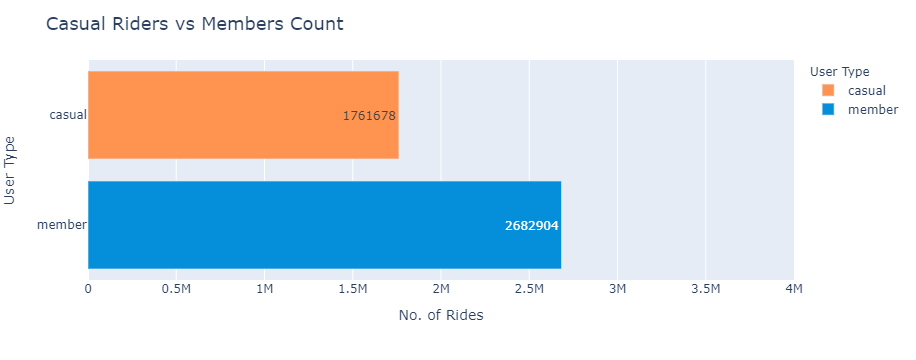

In [56]:
df_pv1 = cyc_data_combined.groupby('member_casual', as_index=False).count()

fig_1 = px.bar(df_pv1, y = 'member_casual', x = 'ride_id', range_x = [0,4000000],
        color = 'member_casual', 
        height = 300,
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'User Type'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_1.update_layout(
    title=dict(text="Casual Riders vs Members Count",font=dict(size=18), automargin=True, yref='paper')
)


__Fig.1__ - Count of casual riders vs members. Members makeup 60% of the dataset

#### <span style='color:#2D8FC5'>Bike Usage: Casual vs Member</span>

In [38]:
df_pv2 = pd.pivot_table(cyc_data_combined,
               index = ['rideable_type', 'member_casual'],
               values = ['ride_id'],
               aggfunc = ['count'],
               margins = True,
               margins_name = 'Total Rides')
df_pv2

count
                             ride_id
rideable_type member_casual         
classic_bike  casual          875554
              member         1724061
docked_bike   casual          166284
              member               0
electric_bike casual          719840
              member          958843
Total Rides                  4444582

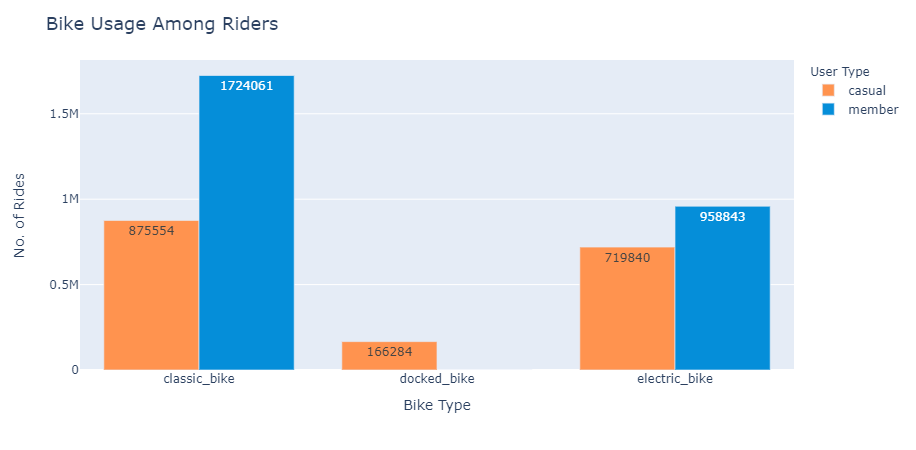

In [65]:
df_pv3 = cyc_data_combined.groupby(['rideable_type', 'member_casual'], as_index=False).count()

fig_2 = px.bar(df_pv3, x = 'rideable_type', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'User Type', 'rideable_type' : 'Bike Type'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length_min': False}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_2.update_layout(
    title=dict(text="Bike Usage Among Riders",font=dict(size=18), automargin=True, yref='paper')
)

__Fig. 2__ - Types of bikes used among riders. Members tend to prefer classic bikes over electric, and do not use docked bikes. Contrastingly, casual members tend to use classic and electric bikes evenly

#### <span style='color:#2D8FC5'>Number of Rides per Month</span>

In [40]:
df_pv4 = pd.pivot_table(cyc_data_combined,
              index = ['year', 'month', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')
df_pv4 = df_pv4.loc[(df_pv4 != 0).any(axis=1)] #filters out data with ride_id count =0
df_pv4

count
                                 ride_id
year        month member_casual         
2022        May   casual          216938
                  member          277162
            Jun   casual          287553
                  member          322256
            Jul   casual          306612
                  member          324307
            Aug   casual          265748
                  member          328577
            Sep   casual          217485
                  member          307844
            Oct   casual          148865
                  member          257460
            Nov   casual           72366
                  member          178766
            Dec   casual           30979
                  member          101634
2023        Jan   casual           29021
                  member          115445
            Feb   casual           32209
                  member          113884
            Mar   casual           45739
                  member          148811
            Apr   casual          108163
                  member          206758
Total Count                      4444582

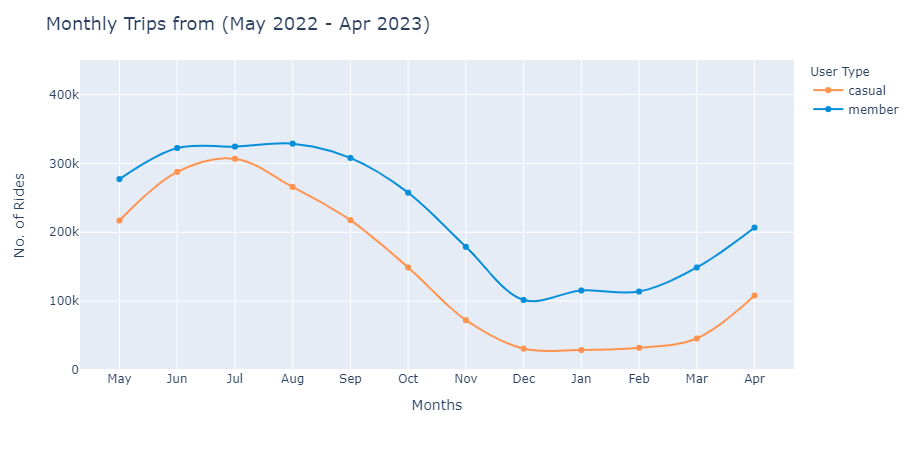

In [67]:
df_pv5 = cyc_data_combined.groupby(['year', 'month', 'member_casual'], as_index=False).count()
df_pv5 = df_pv5[df_pv5['ride_id'] != 0]

fig_3 = px.line(df_pv5, x = 'month', y = 'ride_id', range_y = [0,450000],
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'No. of Rides', 'month': 'Months', 'member_casual': 'User Type'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'year':True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_3.update_layout(
    title=dict(text="Monthly Trips from (May 2022 - Apr 2023)",font=dict(size=18), automargin=True, yref='paper')
)

__Fig. 3__ - Total trips taken in a monthly basis among casual riders and members. On average, both casual riders and members increase bike usage in summer and spring months. 

#### <span style='color:#2D8FC5'>Number of Rides per Weekday</span>

In [42]:
df_pv6 = pd.pivot_table(cyc_data_combined,
              index = ['day', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')
df_pv6

count
                           ride_id
day         member_casual         
Mon         casual          206818
            member          377612
Tue         casual          200989
            member          424685
Wed         casual          209140
            member          431050
Thu         casual          234211
            member          430168
Fri         casual          257111
            member          376682
Sat         casual          356773
            member          339059
Sun         casual          296636
            member          303648
Total Count                4444582

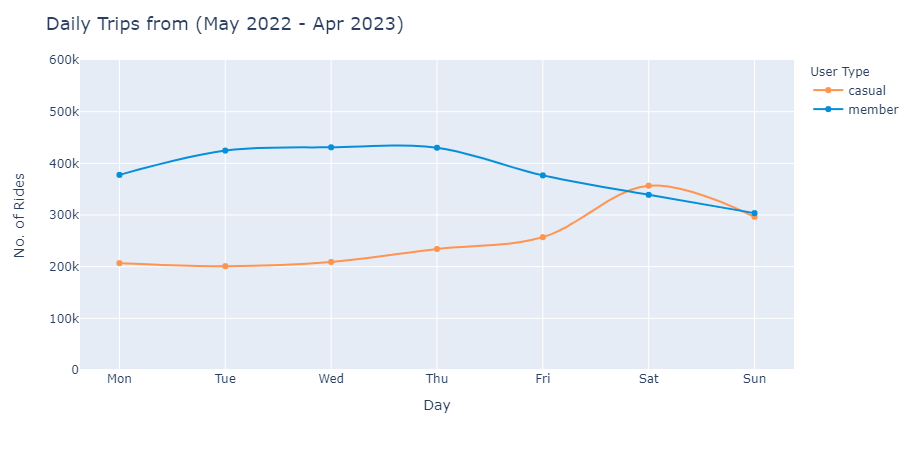

In [68]:
df_pv7 = cyc_data_combined.groupby(['day', 'member_casual'], as_index=False).count()

fig_4 = px.line(df_pv7, x = 'day', y = 'ride_id', range_y = [0,600000],
        color = 'member_casual',  
        line_shape = 'spline',
        markers=True,
        labels = {'ride_id': 'No. of Rides', 'day': 'Day', 'member_casual': 'User Type'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_4.update_layout(
    title=dict(text="Daily Trips from (May 2022 - Apr 2023)",font=dict(size=18), automargin=True, yref='paper')
)

__Fig. 4__ - Daily total trips taken from May 2022 - Apr 2023. An increase in trips is observed among casual riders during the weekends. Members maintain trips undertaken throughout the week and decrease bike usage during the weekend. 

#### <span style='color:#2D8FC5'>Average Number of Rides per Hour</span>

In [44]:
df_pv8 = pd.pivot_table(cyc_data_combined,
              index = ['hour', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')
df_pv8

count
                           ride_id
hour        member_casual         
1           casual           21230
            member           15671
2           casual           12684
            member            8714
3           casual            7028
            member            5240
4           casual            4651
            member            6064
5           casual            8633
            member           25663
6           casual           22909
            member           78731
7           casual           39515
            member          146839
8           casual           54332
            member          173623
9           casual           55873
            member          116811
10          casual           72632
            member          107315
11          casual           93956
            member          127215
12          casual          110755
            member          146500
13          casual          115171
            member          144850
14          casual          121622
            member          144788
15          casual          135107
            member          178182
16          casual          153464
            member          241499
17          casual          171034
            member          290699
18          casual          149882
            member          229009
19          casual          114013
            member          163251
20          casual           83234
            member          113258
21          casual           71218
            member           87511
22          casual           63264
            member           64848
23          casual           46154
            member           40984
24          casual           33317
            member           25639
Total Count                4444582

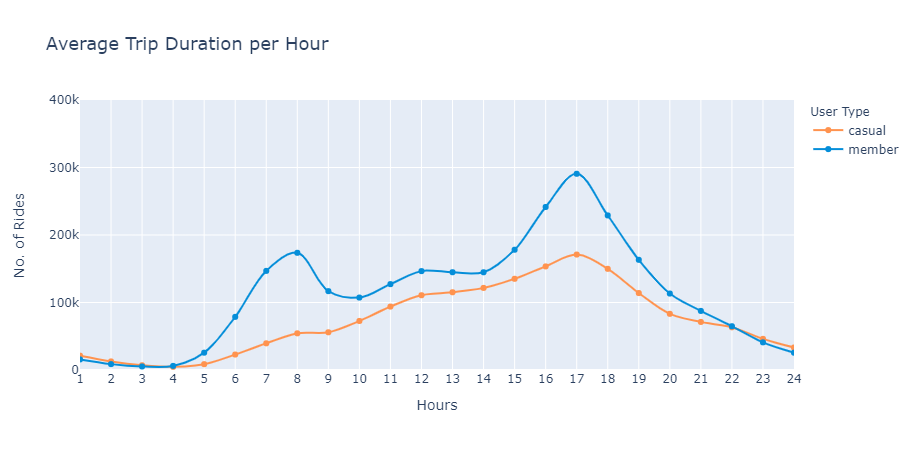

In [74]:
df_pv9 = cyc_data_combined.groupby(['hour', 'member_casual'], as_index=False).count()
fig_5 = px.line(df_pv9, x = 'hour', y = 'ride_id', range_x = [1,24], range_y = [0,400000],
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'No. of Rides', 'hour': 'Hours', 'member_casual': 'User Type'},
                 hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
                 color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'},
                 title="Average Trip Duration per Hour")
fig_5.update_xaxes(dtick=1)
fig_5.update_layout(
    title=dict(font=dict(size=18), automargin=True, yref='paper')
)

__Fig.5__ - Number of trips undertaken in a 24-hour period. Peak hours for both casual riders and members ranges from 3-7pm. A second rush hour peak, intensity to a lower extent, is observed from 6-9am amongst members. 

#### <span style='color:#2D8FC5'>Average trip length</span>

In [46]:
df_pv10 = pd.pivot_table(cyc_data_combined,
               index = 'member_casual',
               values = ['ride_length_min'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')
df_pv10

,mean
,ride_length_min
member_casual,
casual,23.043702
member,12.029953
Total Ride Average,16.395421


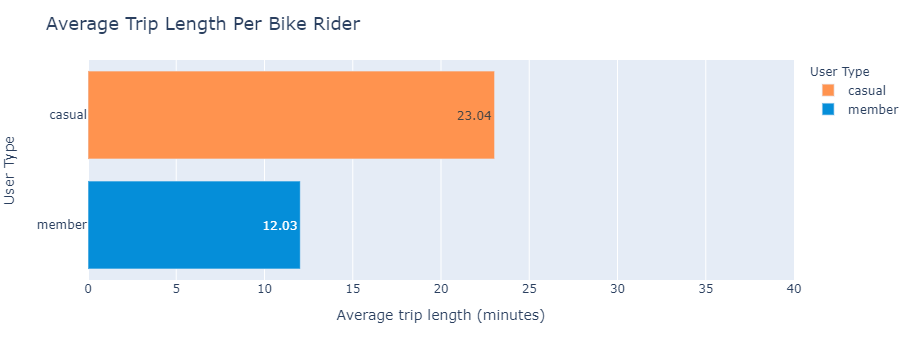

In [72]:
df_pv11 = round(cyc_data_combined.groupby('member_casual', as_index=False)['ride_length_min'].mean(),2)

fig_6 = px.bar(df_pv11, y = 'member_casual', x = 'ride_length_min', range_x = [0,40],
        color = 'member_casual', 
        height = 300,
        text = 'ride_length_min', 
        labels = {'ride_length_min': 'Average trip length (minutes)', 'member_casual': 'User Type'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length_min': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_6.update_layout(
    title=dict(text="Average Trip Length Per Bike Rider",font=dict(size=18), automargin=True, yref='paper')
)

__Fig.6__ - Average trip length per user type in minutes. On average, casual riders use bikes about double the amount the time compared to members.  

In [48]:
df_pv12= cyc_data_combined.groupby(['month', 'member_casual'], as_index=False)[['ride_length_min']].mean().round(2).rename(columns = {'ride_length_min': 'avg_trip_min'})
df_pv12

,month,member_casual,avg_trip_min
0,Jan,casual,14.68
1,Jan,member,9.78
2,Feb,casual,17.54
3,Feb,member,10.20
4,Mar,casual,16.60
5,Mar,member,10.00
6,Apr,casual,22.62
7,Apr,member,11.44
8,May,casual,27.63
9,May,member,13.05


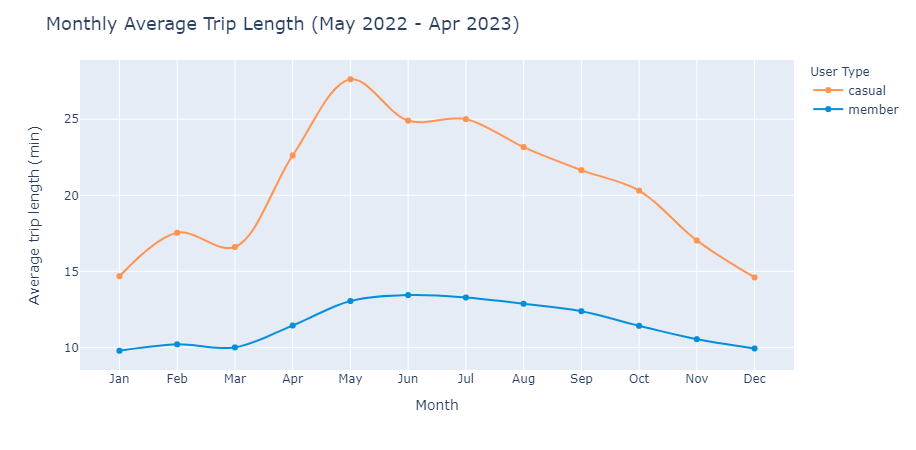

In [75]:
fig_7 = px.line(df_pv12, 
                 x='month', 
                 y='avg_trip_min', 
                 color='member_casual', 
                 markers=True,
                 line_shape='spline',
                 labels={'avg_trip_min': 'Average trip length (min)', 'month': 'Month', 'member_casual': 'User Type'},
                 hover_name='member_casual',
                 hover_data = {'member_casual': False, 'month': True, 'avg_trip_min': True},
                 color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'}
                )
fig_7.update_layout(
    title=dict(text="Monthly Average Trip Length (May 2022 - Apr 2023)",font=dict(size=18), automargin=True, yref='paper')
)

__Fig.7__ - Monthly average trip length for casual riders and members. On average, an increase in trip length for casual riders is observed in the months of March - May followed by a gradual decrease approcahing winter months. 

In [50]:
df_pv13= cyc_data_combined.groupby(['day', 'member_casual'], as_index=False)[['ride_length_min']].mean().round(2).rename(columns={"ride_length_min":"avg_trip_min"})
df_pv13

,day,member_casual,avg_trip_min
0,Mon,casual,23.66
1,Mon,member,11.49
2,Tue,casual,20.63
3,Tue,member,11.45
4,Wed,casual,19.64
5,Wed,member,11.44
6,Thu,casual,20.46
7,Thu,member,11.62
8,Fri,casual,21.90
9,Fri,member,11.82


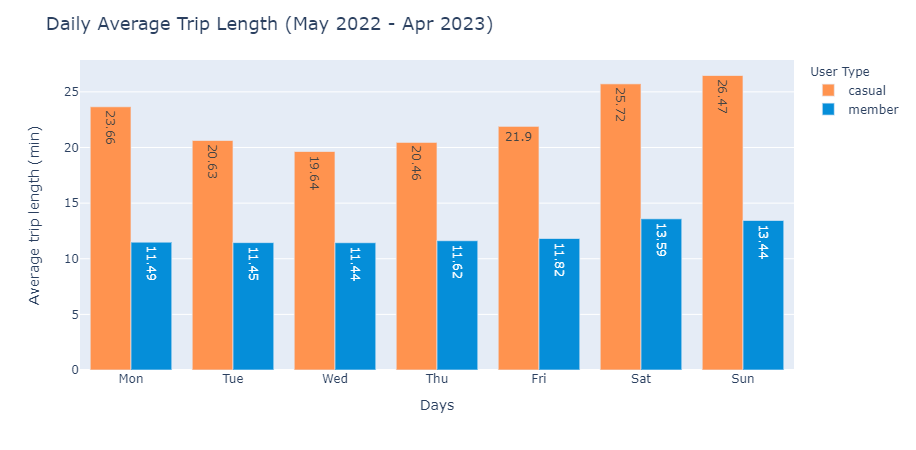

In [79]:
fig_8 = px.bar(df_pv13, x = 'day', y = 'avg_trip_min',
        color = 'member_casual',
        barmode='group',
        text = 'avg_trip_min', 
        labels = {'avg_trip_min': 'Average trip length (min)', 'member_casual': 'User Type', 'day': 'Days'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'avg_trip_min': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_8.update_layout(
    title=dict(text="Daily Average Trip Length (May 2022 - Apr 2023)",font=dict(size=18), automargin=True, yref='paper')
)

__Fig.8__ - Daily average trip length for casual riders and members. On average, members maintain their daily average bike usage. In contrast, an increase in trip length is observed during the weekends for casual riders.

In [52]:
df_pv14= cyc_data_combined.groupby(['hour', 'member_casual'], as_index=False)[['ride_length_min']].mean().round(2).rename(columns={"ride_length_min":"avg_trip_min"})
df_pv14

,hour,member_casual,avg_trip_min
0,1,casual,22.25
1,1,member,11.92
2,2,casual,21.59
3,2,member,12.16
4,3,casual,20.78
5,3,member,11.86
6,4,casual,18.53
7,4,member,12.12
8,5,casual,15.55
9,5,member,9.87


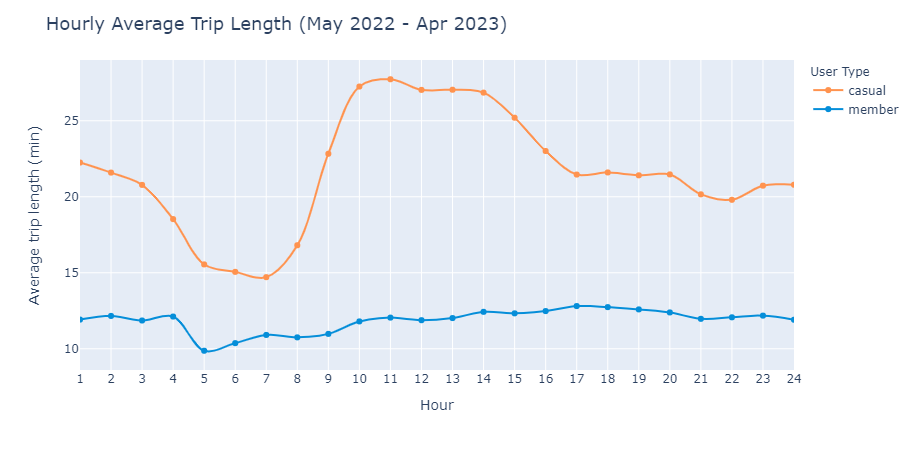

In [80]:
fig_9 = px.line(df_pv14, 
                 x='hour', 
                 y='avg_trip_min', 
                 color='member_casual',
                 range_x = [1,24],
                 markers=True,
                 line_shape='spline',
                 labels={'avg_trip_min': 'Average trip length (min)', 'hour': 'Hour', 'member_casual': 'User Type'},
                 hover_name='member_casual',
                 hover_data = {'member_casual': False, 'hour': True, 'avg_trip_min': True},
                 color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'}
                )
fig_9.update_xaxes(dtick=1)
fig_9.update_layout(
    title=dict(text="Hourly Average Trip Length (May 2022 - Apr 2023)",font=dict(size=18), automargin=True, yref='paper')
)

__Fig.9__ - Hourly average trip length for casual riders and members. On average, members maintain their hourly average bike usage. In contrast, casual riders take longer trips from 9am-4pm. 

#### <span style='color:#2D8FC5'>Top 10 trip starting locations: Casual vs Members</span>

<div class='tableauPlaceholder' id='viz1686265024408' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cy&#47;cyclisticmaps&#47;casualriders&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='cyclisticmaps&#47;casualriders' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cy&#47;cyclisticmaps&#47;casualriders&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1686265024408');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='1000px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='1000px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='750px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<div class='tableauPlaceholder' id='viz1686265104166' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cy&#47;cyclisticmaps&#47;memberriders&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='cyclisticmaps&#47;memberriders' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cy&#47;cyclisticmaps&#47;memberriders&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1686265104166');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='1000px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='1000px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='750px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4 style="background-color:teal;color:white;border-radius: 8px; padding:12px">
    <span style="font-weight:bold">Share:</span> Summarizing Results
    </h4>

Just to quickly recap, since its inception in 2016, Cyclistic's popularity and usefulness amongst users has led to incredulous growth. Cyclistic's bike share program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Similar bike share programs in other metropolitan cities have also experienced growing popularity among local citizens as well as tourists. For the focus of this project, the goal was to determine how casual riders differ from members, and how Cyclistic can capitalize on these differences to increase membership and company revenue through digital advertisement and social media. 

#### <span style='color:#E96E8A'>How do casual riders use bikes differently from members?</span>

#### <span style='color:#2D8FC5'>Casual Riders</span>
* __Percent total:__ 40% of casual riders
* __Popular months:__ May-October (Spring/Summer)
* __Popular days:__ Friday - Saturday with peak on Saturdays
* __Popular times:__ 11am-8pm 
    * __peak__(4-7pm)
* __Average total trip length:__ 21-27min



#### <span style='color:#2D8FC5; font-weight: italic'>Members</span>
* __Percent Total:__ 60% of casual riders
* __Popular Months:__ Consistent throughout the year, with slight increase from May-October (Spring/Summer)
* __Popular Days:__ Mostly during the week, with decrease observed in weekend
* __Popular Times:__ Two peak tiems observed: 
    * __peak1__(6-9am)
    * __peak2__(4-7pm)
* __Average total trip length:__ 12min

<h4 style="background-color:teal;color:white;border-radius: 8px; padding:12px">
    <span style="font-weight:bold">Act:</span> Annual Membership Recommendations
</h4>

#### <span style='color:#2D8FC5'>How do casual riders use bikes differently from members?</span>

Given the even breakdown of the dataset, we can make the following conclusions:

* __Casual riders tend to attract more tourists.__ However, this can't be fully concluded due to lack of availability of credit card payments used for bike rentals. Obtaining user demographics information such as age, work specification, and marital status, and zipcode can help determine particularly which users standout among casual riders. It can be the case that there are tourist who visit as groups, family, or pairs. Given this information, can offer different annual passes that would give different groups an incentive to buy.

* Nonetheless, casual riders can be infered to be tourists given that a spike in casual riders is observed in Spring and Summer months. and popular trip days range from Friday- Sunday. Furthermore, an hour drill down analysis shows that popular ride times range from 11am - 8pm with a peak observed from 4-7pm, with an average trip length ranging from 21-27min. Finally, popular starting locations include `streeter dr and grand dr` which is close to the `Navy Pier` a popular tourist attraction.   


##### <span style='color:#2D8FC5' >So, how can Cyclistic reach out to casual riders to convert them to members?<span>

They can create an annual member program that offers the following benefits:(Note, pricing suggestions taken from [divvy bikeshare in Chicago](https://divvybikes.com/pricing/annual))

1. __Unlock Fee:__ $1 fee for casual riders __(waived for members, includes up to 5 additional locks).__

2. __Reservation:__ Bikes can be unlocked at a first come first serve basis or reserved for $1 per bike __(Waived reservations for annual members, includes up to 5 additional reservations).__
    
3. __Time__: 45min Classic bike rental free for members __(Additional time charged as 50% off for classic bikes, 30% off for ebikes for fixed bike rental rate).__ 

4. __Tour Guide__: 1 free tour guide for member __(10% off for 5 guest passes).__  
    
5. __Tour routes__: Exclusive tour routes for members mapped through app __(Lakefront trail North, lakefront Trail South, Navy Pier, Museums, Promontory Point, Favorite eats).__
    
6. __Point reward system:__ After a set of points get different badges similar to fitbit bage system. After set of points can offer different deals, perks, and rewards.   

7. __Member exclusive perks:__ Can offer discounts to Grubhub and Lyft, hotel or airbnb bookings, and some popular local restaurant chains.
    
8. __Instagram Advertisement/Small Survey:__ members can leave a review, load pictures to Cyclistic IG page and get a discount coupon to one of Chicago's eateries. 
    
9. __Advertisement locations:__ Chicago Harbor Pier since most popular starting location, museums, airports, top 10 local eateries. Can offer advertisement at top 3 starting locations for casual riders. Advertisement can be done in other social media platforms if Cyclistic is already using a given social media advertising tool.
    
10. __Early Bird Special:__ Can begin advertisements prior to Spring/Summer and offer Early Bird discount to riders who subscribe to annual membership.
    
#### <span>Additional Insights<span>
    
##### <span style='color:#2D8FC5'>Further Analysis/Data</span>
Included in the suggested annual membership is up to 5 guests. However, depending on the demographic can offer less or do a family annual plan and a companion pass like Southwest if observed that casual riders reserve 2 bikes consistently.
    
##### <span style='color:#2D8FC5'>Increasing Current Member Demographic</span>
Drawing in more current member demographic has been outside the scope of this analysis. However, given their bike rental habits during the week, and having rental times ~12min strongly suggest they are Chicago local working professionals. A `commute to work` plan with local companies and local governing and transportation services can be done to reduce carbon footprint and improve traffic flow, if any. 

<h4 style="background-color:teal;color:white;border-radius: 8px; padding:12px">
    <span style="font-weight:bold">Acknowlegements</span> 
</h4>

Data Analysis Inspiration:
1. [Tamyris Gimenez Kaggle Notebook](https://www.kaggle.com/code/tamyrisgimenez/cyclistic-bike-share-case-study-with-python/notebook)

2. [Joseph Thomas Kaggle Notebook](https://www.kaggle.com/code/josepharackaparambil/cyclistic-bike-share-analysis-case-study-python/notebook)